In [89]:
!pip install pandas

In [90]:
import pandas as pd

column7_dtype = 'str'
column8_dtype = 'str'

original_dataset = pd.read_csv('/content/drive/MyDrive/MIDA/flights.csv', dtype={7: column7_dtype, 8: column8_dtype})

#Show dataset
print(original_dataset)
print(original_dataset.columns)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0  

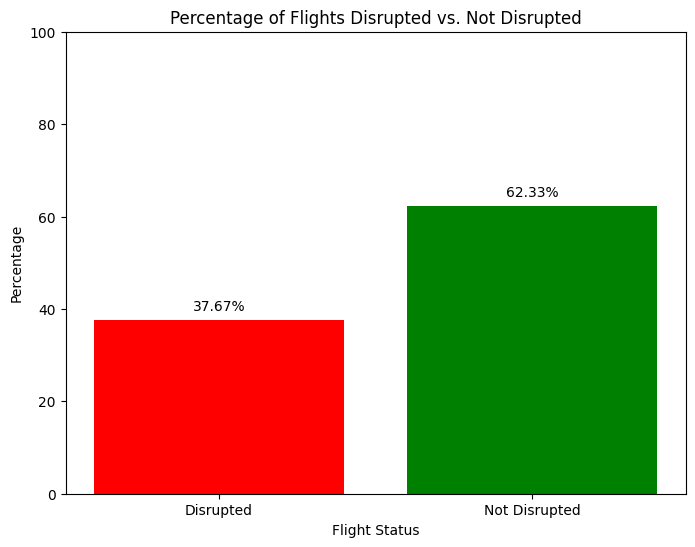

Percentage of flights disrupted (arrival delay > 0, cancelled, or diverted): 37.668624192935
Percentage of flights not disrupted: 62.331375807065


In [91]:
import matplotlib.pyplot as plt

# Create a condition for arrival delay > 0, cancelled, or diverted flights
condition = (original_dataset['ARRIVAL_DELAY'] > 0) | (original_dataset['CANCELLED'] == 1) | (original_dataset['DIVERTED'] == 1)

# Count the number of rows that meet the condition
count_delay_cancel_diverted = condition.sum()

# Count the number of rows that do not meet the condition
count_not_delay_cancel_diverted = len(original_dataset) - count_delay_cancel_diverted

# Calculate the percentage of disrupted and not disrupted flights
percentage_delay_cancel_diverted = (count_delay_cancel_diverted / len(original_dataset)) * 100
percentage_not_delay_cancel_diverted = (count_not_delay_cancel_diverted / len(original_dataset)) * 100

# Create a plot
plt.figure(figsize=(8, 6))
plt.bar(['Disrupted', 'Not Disrupted'], [percentage_delay_cancel_diverted, percentage_not_delay_cancel_diverted], color=['red', 'green'])
plt.title('Percentage of Flights Disrupted vs. Not Disrupted')
plt.xlabel('Flight Status')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.text(0, percentage_delay_cancel_diverted + 2, f'{percentage_delay_cancel_diverted:.2f}%', ha='center')
plt.text(1, percentage_not_delay_cancel_diverted + 2, f'{percentage_not_delay_cancel_diverted:.2f}%', ha='center')
plt.show()

print("Percentage of flights disrupted (arrival delay > 0, cancelled, or diverted):", percentage_delay_cancel_diverted)
print("Percentage of flights not disrupted:", percentage_not_delay_cancel_diverted)


In [92]:
original_dataset['DISRUPTED'] = (original_dataset['ARRIVAL_DELAY'] > 0 | (original_dataset['CANCELLED'] == 1) | (original_dataset['DIVERTED'] == 1))
original_dataset['DISRUPTED'] = original_dataset['DISRUPTED'].astype(int)

# Display the DataFrame with the new column
original_dataset.head()

# Define a list of columns to drop
columns_to_drop = [
    'FLIGHT_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
    'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
    'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
    'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
    'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'YEAR', 'TAIL_NUMBER'
]

# Drop the specified columns from the dataset
original_dataset = original_dataset.drop(columns=columns_to_drop)

rows_with_nan = original_dataset[original_dataset.isnull().any(axis=1)]

# Count rows with any null values in the original dataset
rows_with_null = original_dataset.isna().any(axis=1).sum()

# Display the count
print("Number of rows with any null values:", rows_with_null)
print(rows_with_nan)

Number of rows with any null values: 6
         MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
483174       2    1            7      NK            FLL                 IAG   
619941       2   10            2      NK            FLL                 IAG   
1720237      4   20            1      NK            FLL                 LGA   
1820960      4   26            7      NK            DEN                 DFW   
2031482      5    9            6      NK            MCO                 ACY   
2034453      5   10            7      NK            ORD                 BWI   

         SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  SCHEDULED_ARRIVAL  \
483174                  2215             NaN      1176                107   
619941                  2215             NaN      1176                107   
1720237                 1602             NaN      1076               1900   
1820960                 2059             NaN       641               2350   
2031482               

In [93]:
# Drop rows with any null values in the original dataset
original_dataset = original_dataset.dropna()

# Reset the index of the dataset
original_dataset.reset_index(drop=True, inplace=True)

# Count rows with any null values in the updated dataset (should be 0 now)
rows_with_null = original_dataset.isna().any(axis=1).sum()

# Display the count (it should be 0)
print("Number of rows with any null values after deletion:", rows_with_null)
original_dataset


Number of rows with any null values after deletion: 0


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DISRUPTED
0,1,1,4,AS,ANC,SEA,5,205.0,1448,430,0
1,1,1,4,AA,LAX,PBI,10,280.0,2330,750,0
2,1,1,4,US,SFO,CLT,20,286.0,2296,806,1
3,1,1,4,AA,LAX,MIA,20,285.0,2342,805,0
4,1,1,4,AS,SEA,ANC,25,235.0,1448,320,0
...,...,...,...,...,...,...,...,...,...,...,...
5819068,12,31,4,B6,LAX,BOS,2359,320.0,2611,819,0
5819069,12,31,4,B6,JFK,PSE,2359,227.0,1617,446,0
5819070,12,31,4,B6,JFK,SJU,2359,221.0,1598,440,0
5819071,12,31,4,B6,MCO,SJU,2359,161.0,1189,340,0


In [94]:
# Get unique values for 'ORIGIN_AIRPORT' column
unique_origin_airports = original_dataset['ORIGIN_AIRPORT'].unique()

# Get unique values for 'DESTINATION_AIRPORT' column
unique_destination_airports = original_dataset['DESTINATION_AIRPORT'].unique()

# Concatenate the unique origin and destination airports and calculate the total count
total_unique_airports_origin = len(set(unique_origin_airports))
total_unique_airports_destination = len(set(unique_destination_airports))

# Print the total count of unique airports
print("Total number of unique airports of origin:", total_unique_airports_origin)
print("Total number of unique airports of destination:", total_unique_airports_destination)

Total number of unique airports of origin: 628
Total number of unique airports of destination: 629


In [95]:
from sklearn.model_selection import train_test_split

# Select a subset of airports and airlines
selected_airports = ['ATL', 'SFO', 'DEN', 'ORD', 'LAX', 'DFW', 'SEA', 'JFK', 'LAS', 'MIA']

# Filter rows based on selected airports and airlines
subset_dataset = original_dataset[
    (original_dataset['ORIGIN_AIRPORT'].isin(selected_airports)) &
    (original_dataset['DESTINATION_AIRPORT'].isin(selected_airports))
]

# Separate features and target variable
one_hot = pd.get_dummies(subset_dataset, columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])

one_hot

# Join the datasets
dataset = one_hot

#print(dataset)
print(dataset.columns)
print("Nombre d'individus: " + str(dataset.size))
print("Nombre de columnes : " + str(dataset.columns.size))


Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DISRUPTED',
       'ORIGIN_AIRPORT_ATL', 'ORIGIN_AIRPORT_DEN', 'ORIGIN_AIRPORT_DFW',
       'ORIGIN_AIRPORT_JFK', 'ORIGIN_AIRPORT_LAS', 'ORIGIN_AIRPORT_LAX',
       'ORIGIN_AIRPORT_MIA', 'ORIGIN_AIRPORT_ORD', 'ORIGIN_AIRPORT_SEA',
       'ORIGIN_AIRPORT_SFO', 'DESTINATION_AIRPORT_ATL',
       'DESTINATION_AIRPORT_DEN', 'DESTINATION_AIRPORT_DFW',
       'DESTINATION_AIRPORT_JFK', 'DESTINATION_AIRPORT_LAS',
       'DESTINATION_AIRPORT_LAX', 'DESTINATION_AIRPORT_MIA',
       'DESTINATION_AIRPORT_ORD', 'DESTINATION_AIRPORT_SEA',
       'DESTINATION_AIRPORT_SFO'],
      dtype='object')
Nombre d'individus: 13007341
Nombre de columnes : 29


In [96]:
# Split the dataset into a train set and the rest of the dataset
train_set, _ = train_test_split(dataset, train_size=2000, random_state=42, stratify=dataset["DISRUPTED"])

# Shuffle the train set to ensure randomness
dataset = train_set.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the resulting dataset
dataset.head

<bound method NDFrame.head of       MONTH  DAY  DAY_OF_WEEK AIRLINE  SCHEDULED_DEPARTURE  SCHEDULED_TIME  \
0        12   24            4      VX                  645            70.0   
1         8   15            6      DL                 1346           195.0   
2         4    6            1      UA                  707           339.0   
3         2   18            3      UA                 1052           156.0   
4         5   27            3      B6                  823           104.0   
...     ...  ...          ...     ...                  ...             ...   
1995      7   10            5      AA                 1205           258.0   
1996      8    4            2      UA                  600           123.0   
1997      4   24            5      AA                 2359           220.0   
1998      8   16            7      DL                 1500           125.0   
1999      6   22            1      WN                  910           150.0   

      DISTANCE  SCHEDULED_ARRIVAL

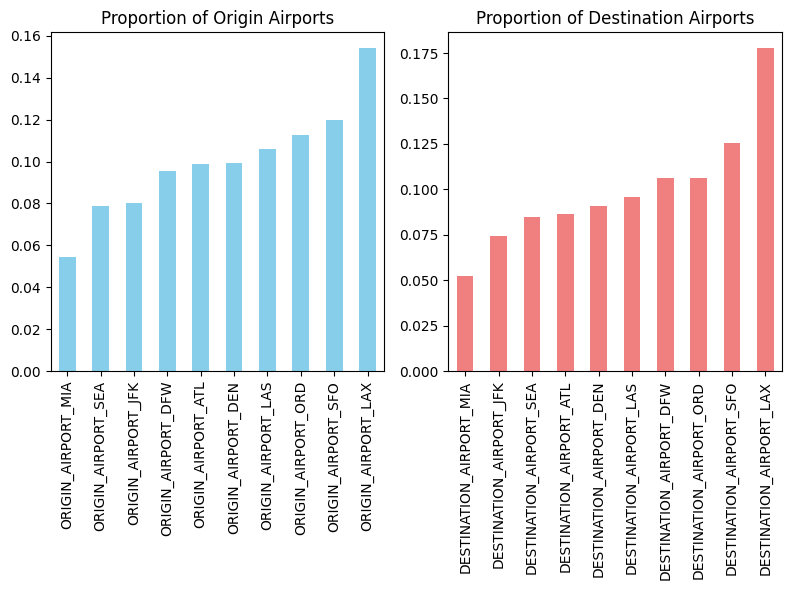

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportions
origin_proportions = dataset.filter(regex='^ORIGIN_AIRPORT_').mean()
destination_proportions = dataset.filter(regex='^DESTINATION_AIRPORT_').mean()

# Plot the proportions
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
origin_proportions.sort_values().plot(kind='bar', color='skyblue')
plt.title('Proportion of Origin Airports')

plt.subplot(1, 3, 2)
destination_proportions.sort_values().plot(kind='bar', color='lightcoral')
plt.title('Proportion of Destination Airports')

plt.tight_layout()
plt.show()


In [98]:
import pandas as pd

# Calculate the total number of disruptions for each airline
disruptions_counts = dataset.groupby('AIRLINE')['DISRUPTED'].value_counts().unstack(fill_value=0)

print(disruptions_counts)

dataset


DISRUPTED    0    1
AIRLINE            
AA         382  222
AS          72   51
B6          43   18
DL         253  115
EV           1    0
F9          39   42
MQ           1    1
NK          21   30
OO          38   28
UA         189  128
VX          72   59
WN         112   83


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DISRUPTED,ORIGIN_AIRPORT_ATL,...,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO
0,12,24,4,VX,645,70.0,236,755,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8,15,6,DL,1346,195.0,1199,1501,0,1,...,0,1,0,0,0,0,0,0,0,0
2,4,6,1,UA,707,339.0,2586,1546,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2,18,3,UA,1052,156.0,1024,1428,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,27,3,B6,823,104.0,414,1007,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7,10,5,AA,1205,258.0,1660,1423,0,0,...,0,0,0,0,0,0,0,0,1,0
1996,8,4,2,UA,600,123.0,679,803,0,0,...,0,0,0,0,0,0,0,0,1,0
1997,4,24,5,AA,2359,220.0,1514,539,0,0,...,0,0,0,0,0,0,0,1,0,0
1998,8,16,7,DL,1500,125.0,594,1705,0,1,...,0,0,0,0,0,0,1,0,0,0


In [99]:
# Iterate over each row in disruptions_counts and update 'dataset'
for index, row in disruptions_counts.iterrows():
    airline_code = index
    tends_to_disruptions = row[1] > row[0]

    # Update 'AIRLINE_TENDS_TO_DISRUPTIONS' column for the specific airline in 'dataset'
    dataset.loc[dataset['AIRLINE'] == airline_code, 'AIRLINE_TENDS_TO_DISRUPTIONS'] = tends_to_disruptions.astype(int)

# Fill any potential NaN values with 0
dataset['AIRLINE_TENDS_TO_DISRUPTIONS'] = dataset['AIRLINE_TENDS_TO_DISRUPTIONS'].fillna(0)

# Convert to integer type
dataset['AIRLINE_TENDS_TO_DISRUPTIONS'] = dataset['AIRLINE_TENDS_TO_DISRUPTIONS'].astype(int)

dataset

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DISRUPTED,ORIGIN_AIRPORT_ATL,...,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,AIRLINE_TENDS_TO_DISRUPTIONS
0,12,24,4,VX,645,70.0,236,755,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8,15,6,DL,1346,195.0,1199,1501,0,1,...,1,0,0,0,0,0,0,0,0,0
2,4,6,1,UA,707,339.0,2586,1546,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2,18,3,UA,1052,156.0,1024,1428,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,27,3,B6,823,104.0,414,1007,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7,10,5,AA,1205,258.0,1660,1423,0,0,...,0,0,0,0,0,0,0,1,0,0
1996,8,4,2,UA,600,123.0,679,803,0,0,...,0,0,0,0,0,0,0,1,0,0
1997,4,24,5,AA,2359,220.0,1514,539,0,0,...,0,0,0,0,0,0,1,0,0,0
1998,8,16,7,DL,1500,125.0,594,1705,0,1,...,0,0,0,0,0,1,0,0,0,0


In [100]:
# Filter the dataset to include only rows where 'AIRLINE_TENDS_TO_DISRUPTIONS' is 1
airlines_tend_to_disruptions = dataset[dataset['AIRLINE_TENDS_TO_DISRUPTIONS'] == 1]

# Display the unique airlines in the filtered dataset
unique_airlines_tend_to_disruptions = airlines_tend_to_disruptions['AIRLINE'].unique()
print("Airlines that tend to disruptions:", unique_airlines_tend_to_disruptions)


Airlines that tend to disruptions: ['F9' 'NK']


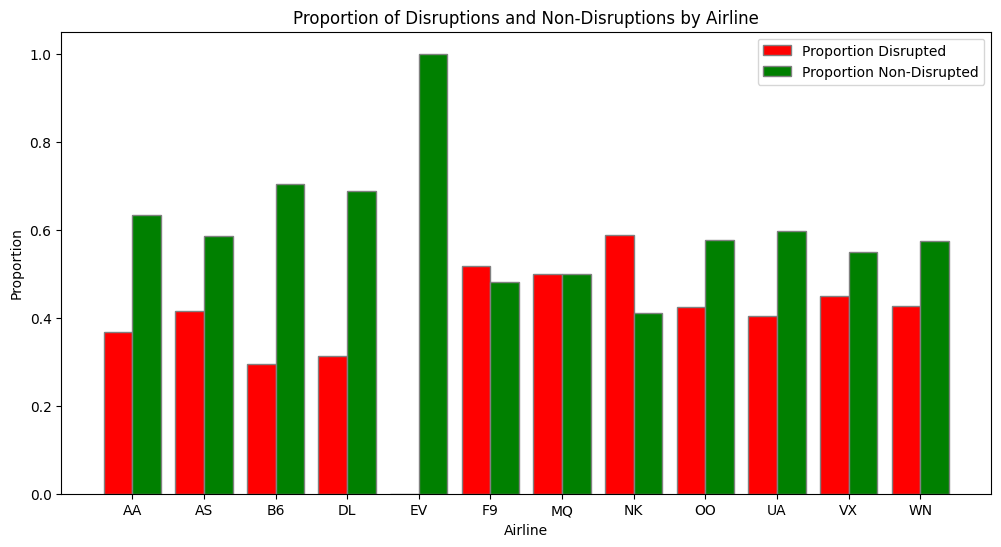

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of disruptions and non-disruptions for each airline
proportion_disruptions = dataset.groupby('AIRLINE')['DISRUPTED'].mean()
proportion_non_disruptions = 1 - proportion_disruptions

# Plot the proportions
plt.figure(figsize=(12, 6))
barWidth = 0.4
r1 = range(len(proportion_disruptions))
r2 = [x + barWidth for x in r1]

plt.bar(r1, proportion_disruptions, color='red', width=barWidth, edgecolor='grey', label='Proportion Disrupted')
plt.bar(r2, proportion_non_disruptions, color='green', width=barWidth, edgecolor='grey', label='Proportion Non-Disrupted')

plt.xlabel('Airline')
plt.ylabel('Proportion')
plt.xticks([r + barWidth/2 for r in range(len(proportion_disruptions))], proportion_disruptions.index)
plt.title('Proportion of Disruptions and Non-Disruptions by Airline')
plt.legend()

plt.show()


In [102]:
#Drop ARILINE column

del dataset['AIRLINE']

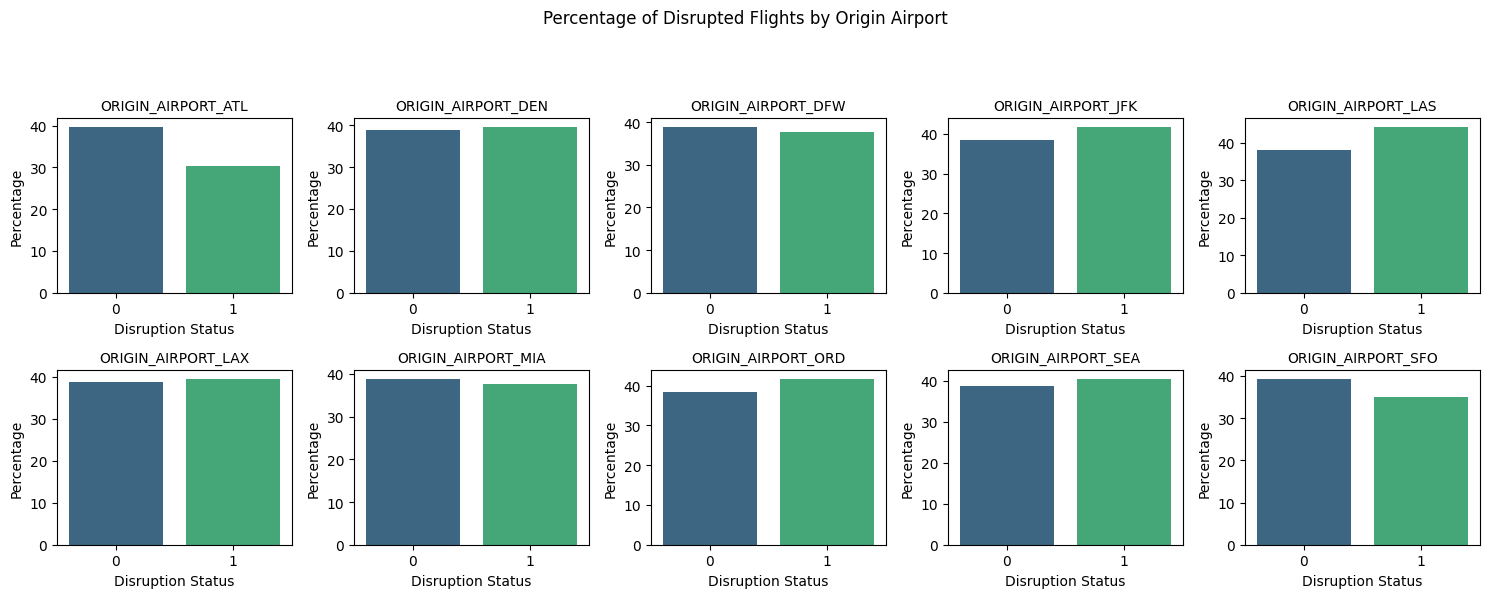

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns


# List of columns related to each origin airport
origin_airport_columns = [
    'ORIGIN_AIRPORT_ATL', 'ORIGIN_AIRPORT_DEN', 'ORIGIN_AIRPORT_DFW',
    'ORIGIN_AIRPORT_JFK', 'ORIGIN_AIRPORT_LAS', 'ORIGIN_AIRPORT_LAX',
    'ORIGIN_AIRPORT_MIA', 'ORIGIN_AIRPORT_ORD', 'ORIGIN_AIRPORT_SEA',
    'ORIGIN_AIRPORT_SFO'
]

# Create subplots for each origin airport
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.suptitle('Percentage of Disrupted Flights by Origin Airport', y=1.02)

# Flatten the 2D array of subplots
axes = axes.flatten()

# Iterate over each origin airport column
for i, origin_airport_column in enumerate(origin_airport_columns):
    # Calculate the percentage of disrupted and not disrupted flights for the current origin airport
    origin_airport_disruption_percentages = dataset.groupby(origin_airport_column)['DISRUPTED'].mean() * 100

    # Plot the percentages
    sns.barplot(x=origin_airport_disruption_percentages.index, y=origin_airport_disruption_percentages.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{origin_airport_column}', fontsize=10)  # Adjust the title font size
    axes[i].set_xlabel('Disruption Status')
    axes[i].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin to make space for the main title
plt.show()


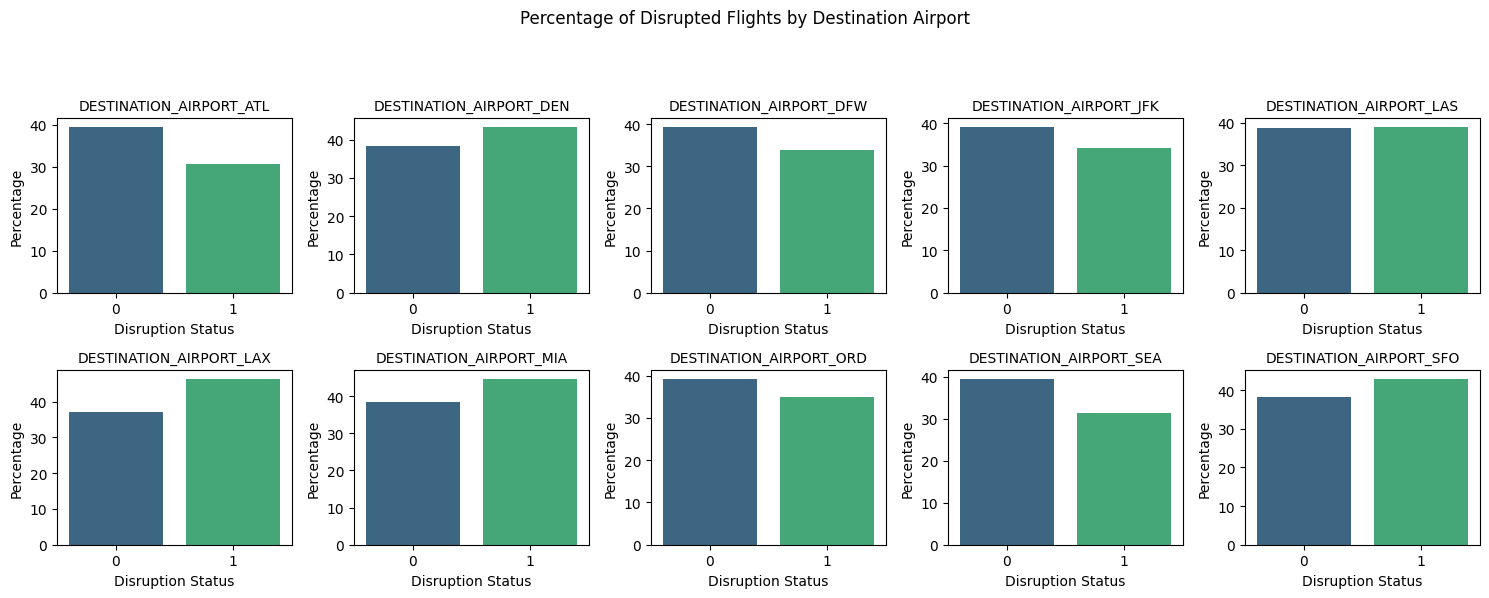

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns related to each destination airport
destination_airport_columns = [
    'DESTINATION_AIRPORT_ATL', 'DESTINATION_AIRPORT_DEN', 'DESTINATION_AIRPORT_DFW',
    'DESTINATION_AIRPORT_JFK', 'DESTINATION_AIRPORT_LAS', 'DESTINATION_AIRPORT_LAX',
    'DESTINATION_AIRPORT_MIA', 'DESTINATION_AIRPORT_ORD', 'DESTINATION_AIRPORT_SEA',
    'DESTINATION_AIRPORT_SFO'
]

# Create subplots for each destination airport
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.suptitle('Percentage of Disrupted Flights by Destination Airport', y=1.02)

# Flatten the 2D array of subplots
axes = axes.flatten()

# Iterate over each destination airport column
for i, destination_airport_column in enumerate(destination_airport_columns):
    # Calculate the percentage of disrupted and not disrupted flights for the current destination airport
    destination_airport_disruption_percentages = dataset.groupby(destination_airport_column)['DISRUPTED'].mean() * 100

    # Plot the percentages
    sns.barplot(x=destination_airport_disruption_percentages.index, y=destination_airport_disruption_percentages.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{destination_airport_column}', fontsize=10)  # Adjust the title font size
    axes[i].set_xlabel('Disruption Status')
    axes[i].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin to make space for the main title
plt.show()


In [105]:
dataset.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DISRUPTED,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_DEN,...,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,AIRLINE_TENDS_TO_DISRUPTIONS
0,12,24,4,645,70.0,236,755,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8,15,6,1346,195.0,1199,1501,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,4,6,1,707,339.0,2586,1546,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2,18,3,1052,156.0,1024,1428,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,27,3,823,104.0,414,1007,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Transformem les dades cícliques

In [106]:
dataset.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DISRUPTED,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_DEN,...,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,AIRLINE_TENDS_TO_DISRUPTIONS
0,12,24,4,645,70.0,236,755,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8,15,6,1346,195.0,1199,1501,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,4,6,1,707,339.0,2586,1546,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2,18,3,1052,156.0,1024,1428,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,27,3,823,104.0,414,1007,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [107]:
import numpy as np
# Apply a cyclical transformation to DAY
dataset['DAY'] = np.sin(2 * np.pi * dataset['DAY'] / 31)
dataset['DAY'] = (dataset['DAY'] + 1) / 2  # Scale to [0, 1]

# Apply a cyclical transformation to DAY_OF_WEEK
dataset['DAY_OF_WEEK'] = np.sin(2 * np.pi * dataset['DAY_OF_WEEK'] / 7)
dataset['DAY_OF_WEEK'] = (dataset['DAY_OF_WEEK'] + 1) / 2  # Scale to [0, 1]

# Apply a cyclical transformation to MONTH
dataset['MONTH'] = np.sin(2 * np.pi * dataset['MONTH'] / 12)
dataset['MONTH'] = (dataset['MONTH'] + 1) / 2  # Scale to [0, 1]

import numpy as np

# Apply a cyclical transformation to SCHEDULED_DEPARTURE
dataset['SCHEDULED_DEPARTURE'] = np.sin(2 * np.pi * (dataset['SCHEDULED_DEPARTURE'] / 2400))
dataset['SCHEDULED_DEPARTURE'] = (dataset['SCHEDULED_DEPARTURE'] + 1) / 2  # Scale to [0, 1]

# Apply a cyclical transformation to SCHEDULED_ARRIVAL
dataset['SCHEDULED_ARRIVAL'] = np.sin(2 * np.pi * (dataset['SCHEDULED_ARRIVAL'] / 2400))
dataset['SCHEDULED_ARRIVAL'] = (dataset['SCHEDULED_ARRIVAL'] + 1) / 2  # Scale to [0, 1]

dataset

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DISRUPTED,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_DEN,...,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,AIRLINE_TENDS_TO_DISRUPTIONS
0,0.500000,0.005766,0.283058,0.996534,70.0,236,0.959396,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.066987,0.550584,0.109084,0.313506,195.0,1199,0.145522,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0.933013,0.968876,0.890916,0.980510,339.0,2586,0.106532,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.933013,0.257349,0.716942,0.688920,156.0,1024,0.218958,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.750000,0.137604,0.716942,0.917184,104.0,414,0.742023,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.250000,0.948902,0.012536,0.493455,258.0,1660,0.224395,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1996,0.066987,0.862396,0.987464,1.000000,123.0,679,0.931036,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1997,0.933013,0.005766,0.012536,0.446434,220.0,1514,0.993638,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1998,0.066987,0.449416,0.500000,0.146447,125.0,594,0.015385,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [108]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataset is called 'final_normalized_dataset'
columns_to_normalize = ['SCHEDULED_TIME', 'DISTANCE']

# Apply Min-Max scaling to selected columns
scaler = MinMaxScaler()
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

# Display the resulting normalized dataset
dataset

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DISRUPTED,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_DEN,...,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,AIRLINE_TENDS_TO_DISRUPTIONS
0,0.500000,0.005766,0.283058,0.996534,0.027933,0.000000,0.959396,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.066987,0.550584,0.109084,0.313506,0.377095,0.387058,0.145522,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0.933013,0.968876,0.890916,0.980510,0.779330,0.944534,0.106532,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.933013,0.257349,0.716942,0.688920,0.268156,0.316720,0.218958,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.750000,0.137604,0.716942,0.917184,0.122905,0.071543,0.742023,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.250000,0.948902,0.012536,0.493455,0.553073,0.572347,0.224395,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1996,0.066987,0.862396,0.987464,1.000000,0.175978,0.178055,0.931036,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1997,0.933013,0.005766,0.012536,0.446434,0.446927,0.513666,0.993638,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1998,0.066987,0.449416,0.500000,0.146447,0.181564,0.143891,0.015385,0,1,0,...,0,0,0,0,0,1,0,0,0,0


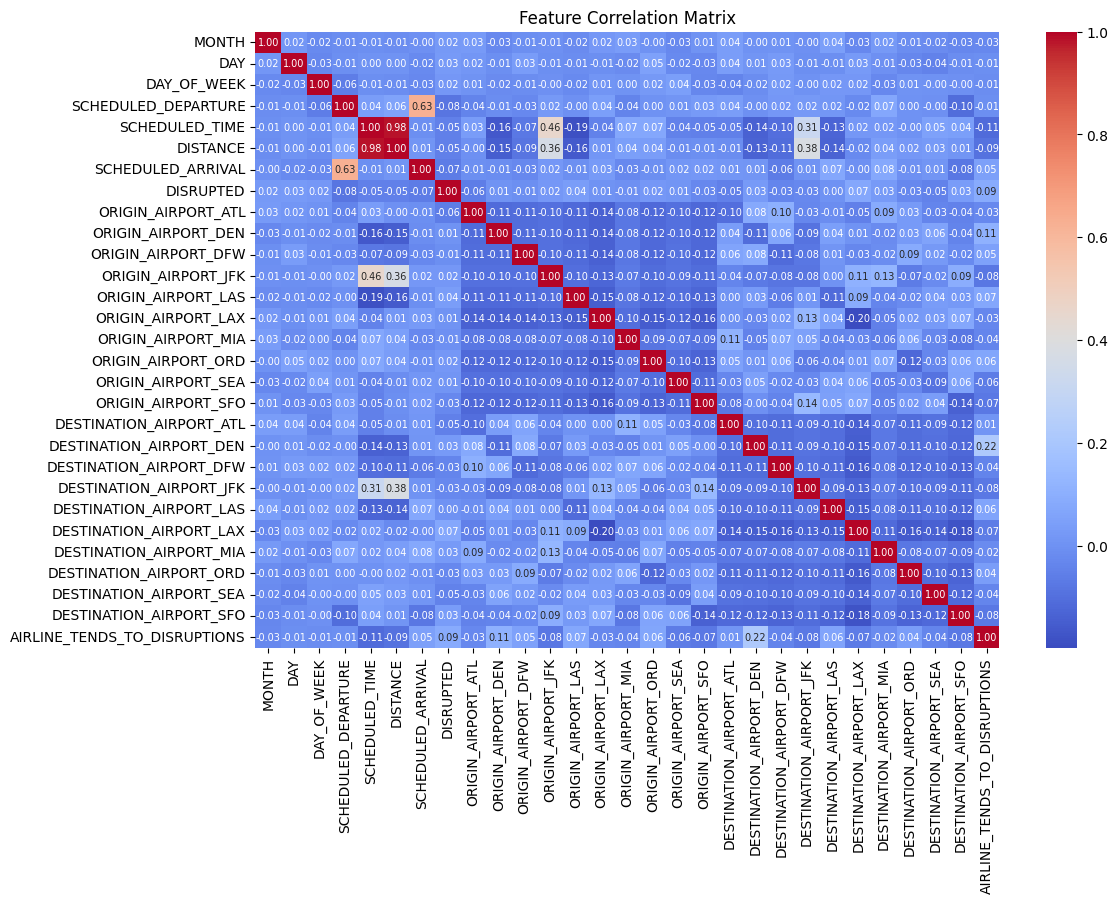

In [109]:
# Check for correlations between features
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size":7}, fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [110]:
del dataset['SCHEDULED_ARRIVAL']
del dataset['DISTANCE']

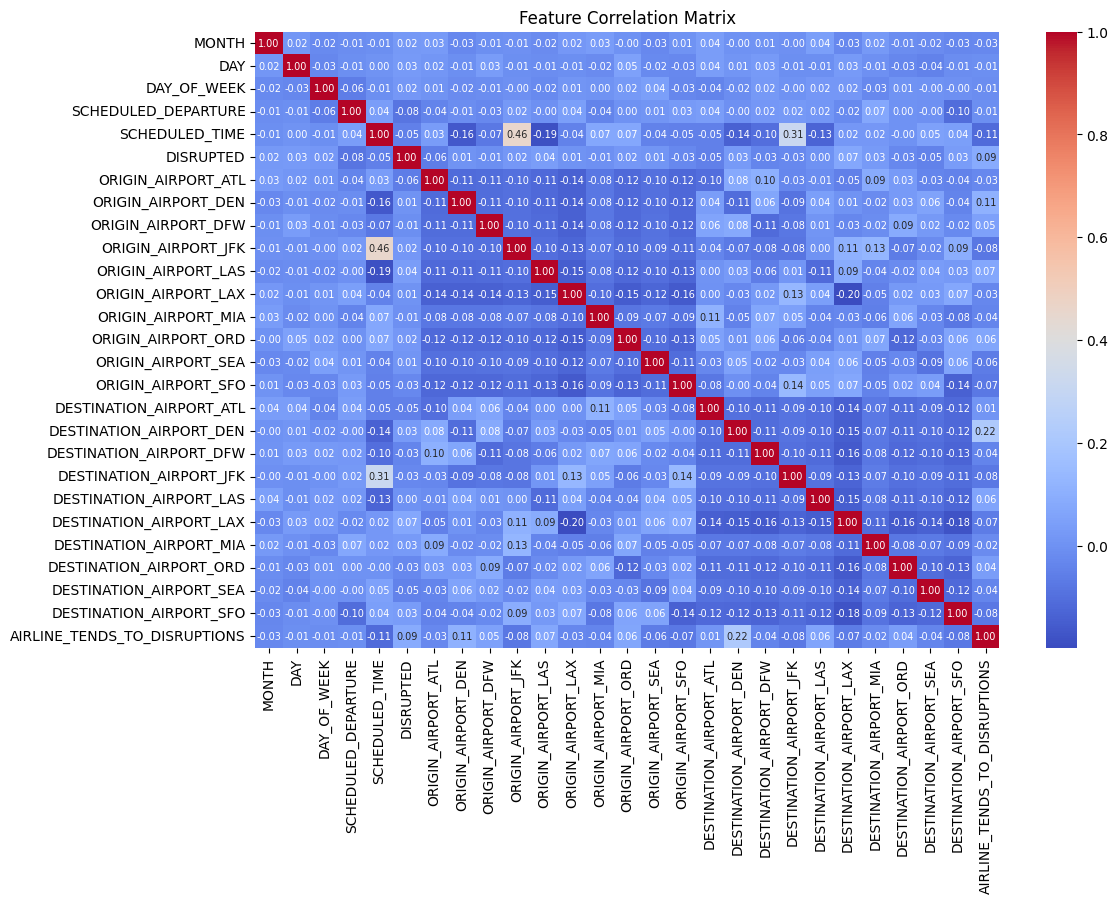

In [111]:
# Check for correlations between features after deletion of SCHEDULED ARRIVAL and DISTANCE
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size":7}, fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

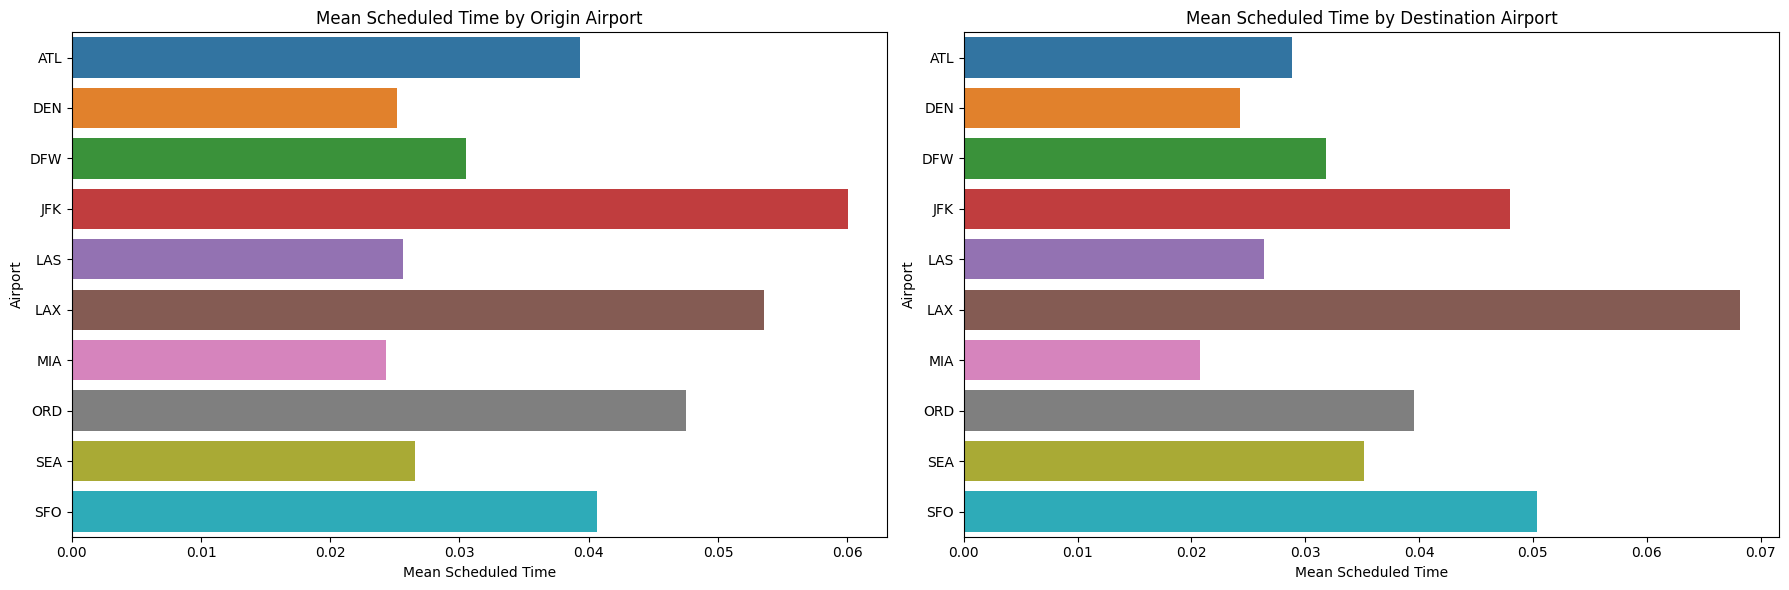

In [112]:
# Calculate the mean scheduled time for all flights grouped by each origin airport
mean_scheduled_time_by_origin_airport = dataset.filter(regex='^ORIGIN_AIRPORT_').multiply(dataset['SCHEDULED_TIME'], axis=0).mean()

# Calculate the mean scheduled time for all flights grouped by each destination airport
mean_scheduled_time_by_destination_airport = dataset.filter(regex='^DESTINATION_AIRPORT_').multiply(dataset['SCHEDULED_TIME'], axis=0).mean()

# Convert to DataFrame for plotting
mean_scheduled_time_by_origin_airport_df = mean_scheduled_time_by_origin_airport.reset_index()
mean_scheduled_time_by_origin_airport_df.columns = ['Airport', 'Mean Scheduled Time']
mean_scheduled_time_by_origin_airport_df['Airport'] = mean_scheduled_time_by_origin_airport_df['Airport'].str.replace('ORIGIN_AIRPORT_', '')

mean_scheduled_time_by_destination_airport_df = mean_scheduled_time_by_destination_airport.reset_index()
mean_scheduled_time_by_destination_airport_df.columns = ['Airport', 'Mean Scheduled Time']
mean_scheduled_time_by_destination_airport_df['Airport'] = mean_scheduled_time_by_destination_airport_df['Airport'].str.replace('DESTINATION_AIRPORT_', '')

# Create the plots for mean scheduled time
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot for mean scheduled time by origin airport
sns.barplot(x='Mean Scheduled Time', y='Airport', data=mean_scheduled_time_by_origin_airport_df, ax=ax[0])
ax[0].set_title('Mean Scheduled Time by Origin Airport')
ax[0].set_xlabel('Mean Scheduled Time')
ax[0].set_ylabel('Airport')

# Plot for mean scheduled time by destination airport
sns.barplot(x='Mean Scheduled Time', y='Airport', data=mean_scheduled_time_by_destination_airport_df, ax=ax[1])
ax[1].set_title('Mean Scheduled Time by Destination Airport')
ax[1].set_xlabel('Mean Scheduled Time')
ax[1].set_ylabel('Airport')

plt.tight_layout()
plt.show()


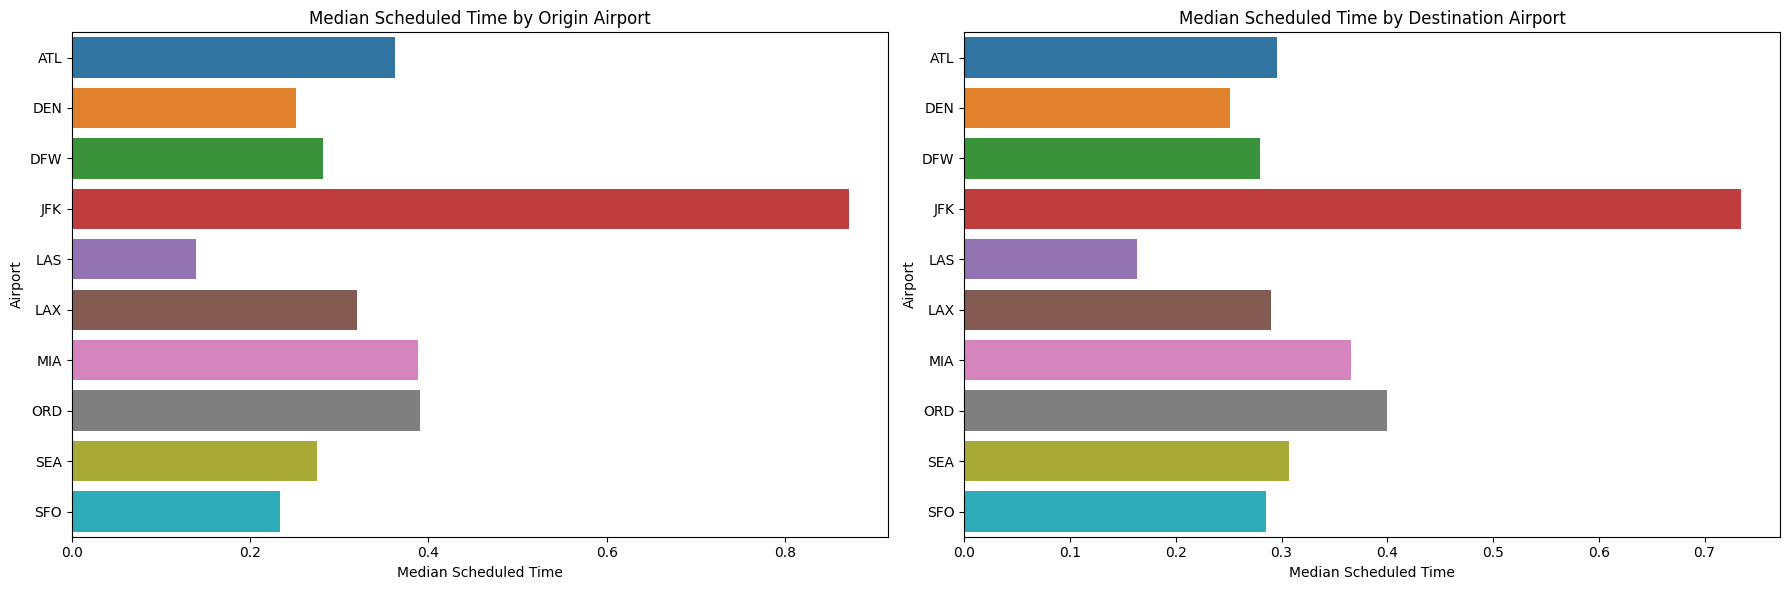

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get a list of columns that correspond to origin airports
origin_airport_columns = dataset.filter(like='ORIGIN_AIRPORT_').columns

# Initialize an empty dictionary to store median scheduled times for each origin airport
median_scheduled_times_by_origin = {}

# Calculate the median for each origin airport
for airport_column in origin_airport_columns:
    airport_code = airport_column.replace('ORIGIN_AIRPORT_', '')
    scheduled_times = dataset[dataset[airport_column] == 1]['SCHEDULED_TIME']
    median_scheduled_time = np.median(scheduled_times)
    median_scheduled_times_by_origin[airport_code] = median_scheduled_time

# Create a DataFrame for plotting median scheduled time by origin airport
median_scheduled_time_by_origin_df = pd.DataFrame(
    list(median_scheduled_times_by_origin.items()), columns=['Airport', 'Median Scheduled Time']
)

# Get a list of columns that correspond to destination airports
destination_airport_columns = dataset.filter(like='DESTINATION_AIRPORT_').columns

# Initialize an empty dictionary to store median scheduled times for each destination airport
median_scheduled_times_by_destination = {}

# Calculate the median for each destination airport
for airport_column in destination_airport_columns:
    airport_code = airport_column.replace('DESTINATION_AIRPORT_', '')
    scheduled_times = dataset[dataset[airport_column] == 1]['SCHEDULED_TIME']
    median_scheduled_time = np.median(scheduled_times)
    median_scheduled_times_by_destination[airport_code] = median_scheduled_time

# Create a DataFrame for plotting median scheduled time by destination airport
median_scheduled_time_by_destination_df = pd.DataFrame(
    list(median_scheduled_times_by_destination.items()), columns=['Airport', 'Median Scheduled Time']
)

# Create subplots for origin and destination airports
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot for median scheduled time by origin airport
sns.barplot(x='Median Scheduled Time', y='Airport', data=median_scheduled_time_by_origin_df, ax=ax[0])
ax[0].set_title('Median Scheduled Time by Origin Airport')
ax[0].set_xlabel('Median Scheduled Time')
ax[0].set_ylabel('Airport')

# Plot for median scheduled time by destination airport
sns.barplot(x='Median Scheduled Time', y='Airport', data=median_scheduled_time_by_destination_df, ax=ax[1])
ax[1].set_title('Median Scheduled Time by Destination Airport')
ax[1].set_xlabel('Median Scheduled Time')
ax[1].set_ylabel('Airport')

plt.tight_layout()
plt.show()


In [114]:
import numpy as np

# Filter the dataset to include only rows with destination airport LAX
lax_flights = dataset[dataset['DESTINATION_AIRPORT_LAX'] == 1]

# Filter the dataset to include only rows with destination airport JFK
jfk_flights = dataset[dataset['DESTINATION_AIRPORT_JFK'] == 1]

# Extract the 'SCHEDULED_TIME' column for LAX and JFK flights
scheduled_times_lax = lax_flights['SCHEDULED_TIME']
scheduled_times_jfk = jfk_flights['SCHEDULED_TIME']

# Calculate the median for LAX and JFK flights
median_scheduled_time_lax = np.median(scheduled_times_lax)
median_scheduled_time_jfk = np.median(scheduled_times_jfk)

# Print the median scheduled times for LAX and JFK flights
print("Median Scheduled Time for Flights with Destination Airport LAX:", median_scheduled_time_lax)
print("Median Scheduled Time for Flights with Destination Airport JFK:", median_scheduled_time_jfk)


Median Scheduled Time for Flights with Destination Airport LAX: 0.2905027932960894
Median Scheduled Time for Flights with Destination Airport JFK: 0.7346368715083799


In [115]:
# Save the DataFrame to CSV
dataset.to_csv('flights_clean.csv', index=False)


PREPROCESSING DONE

In [116]:
import pandas as pd
dataset = pd.read_csv('flights_clean.csv')
dataset

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISRUPTED,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_JFK,...,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,AIRLINE_TENDS_TO_DISRUPTIONS
0,0.500000,0.005766,0.283058,0.996534,0.027933,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.066987,0.550584,0.109084,0.313506,0.377095,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.933013,0.968876,0.890916,0.980510,0.779330,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.933013,0.257349,0.716942,0.688920,0.268156,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.750000,0.137604,0.716942,0.917184,0.122905,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.250000,0.948902,0.012536,0.493455,0.553073,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1996,0.066987,0.862396,0.987464,1.000000,0.175978,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1997,0.933013,0.005766,0.012536,0.446434,0.446927,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1998,0.066987,0.449416,0.500000,0.146447,0.181564,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
